In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm
%matplotlib inline
from scipy.stats import mstats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


# Data Cleaning


In [3]:
df=pd.read_csv("/kaggle/input/new-loan/Loan_Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.Gender.fillna(df.Gender.mode()[0],inplace = True)

/tmp/ipykernel_23/3079310053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.fillna(df.Gender.mode()[0],inplace = True)


In [7]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

/tmp/ipykernel_23/3324225749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [8]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

/tmp/ipykernel_23/891759981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0], inplace=True)


In [9]:
df.Dependents.fillna(df['Dependents'].mode()[0], inplace=True)

/tmp/ipykernel_23/3945642479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Dependents.fillna(df['Dependents'].mode()[0], inplace=True)


In [10]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace = True)

/tmp/ipykernel_23/1491519509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.LoanAmount.fillna(df.LoanAmount.mean(),inplace = True)


In [11]:

df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0], inplace=True)


/tmp/ipykernel_23/3860491915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0], inplace=True)


In [12]:
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace = True)

/tmp/ipykernel_23/937805133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Credit_History.fillna(df.Credit_History.mode()[0],inplace = True)


In [13]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.duplicated().sum()

0

# FEATURE ENGINEERING

**How much is the total income of someone who takes a loan?**

<Axes: >

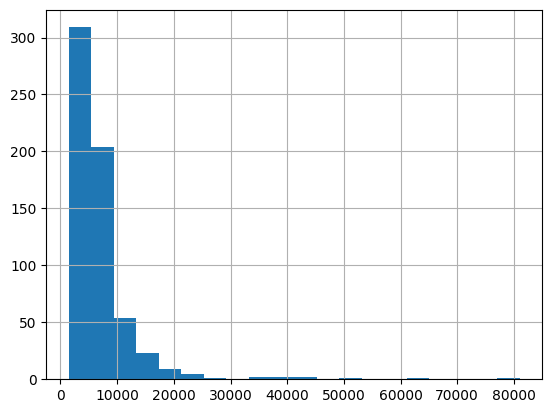

In [16]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome'].hist(bins=20)

**IT IS SKEWED DATA, SO WE NEED TO APPLY LOG**

<Axes: >

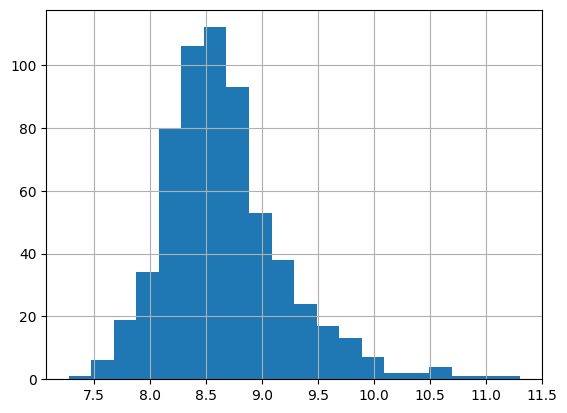

In [17]:
df['TotalIncome']=np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

<Axes: >

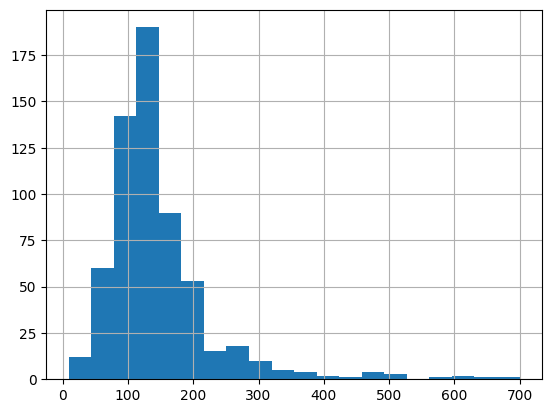

In [18]:
df['LoanAmount'].hist(bins=20)

**IT IS SKEWED DATA, SO WE NEED TO APPLY LOG**

<Axes: >

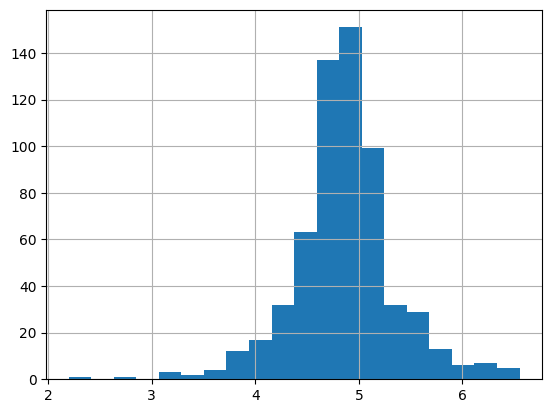

In [19]:
df['LoanAmount']=np.log(df['LoanAmount'])
df['LoanAmount'].hist(bins=20)

# UNIVARIATE ANALYSIS

**How many the number of people who take a loan as group by marital status?**

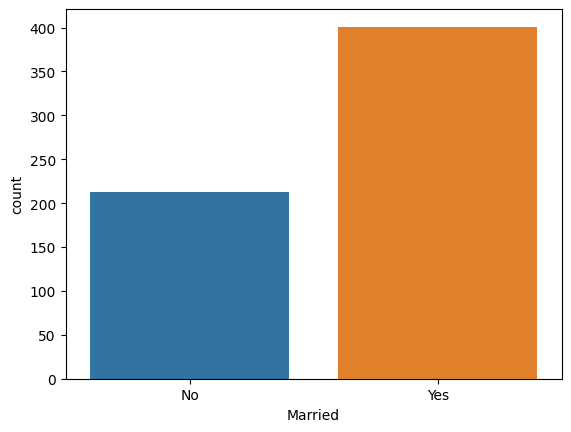

In [20]:
sns.countplot(x='Married',data=df);

**How many the number of people who take a loan as group by gender?**

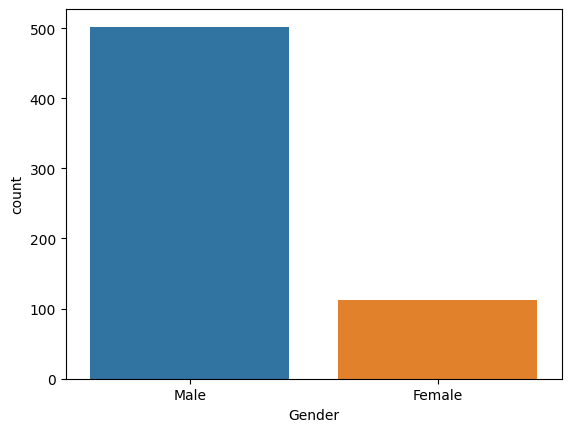

In [21]:
sns.countplot(x='Gender',data=df);

**How many the number of people who take loan by dependents?**

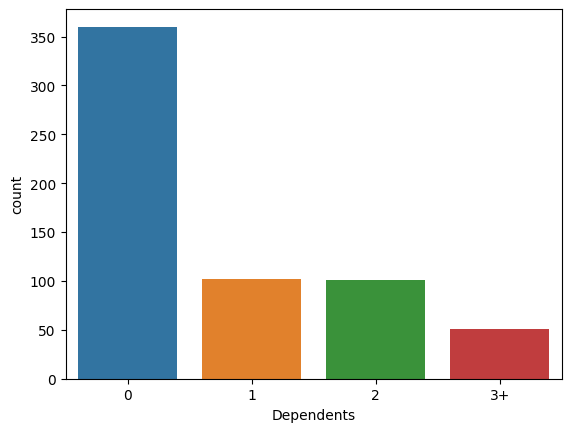

In [22]:
sns.countplot(x='Dependents',data=df);

**How many the number of people who take loan are self employed?**

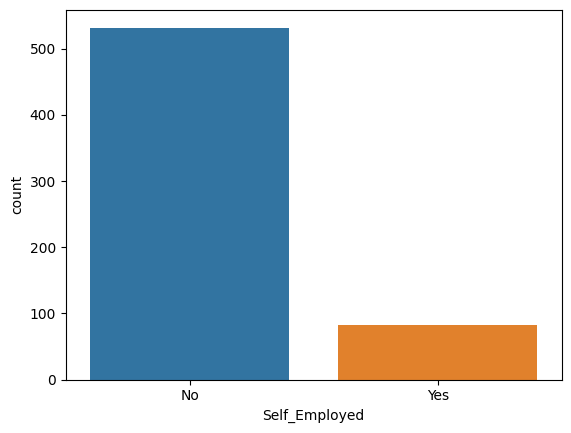

In [23]:
sns.countplot(x='Self_Employed',data=df);

**How many the number of people who take loan have a credit history?**

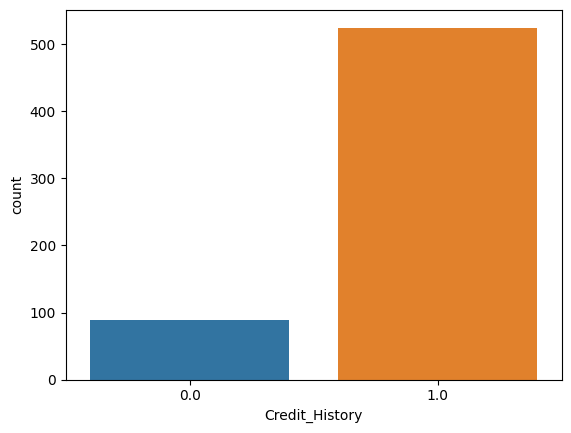

In [24]:
sns.countplot(x='Credit_History',data=df);

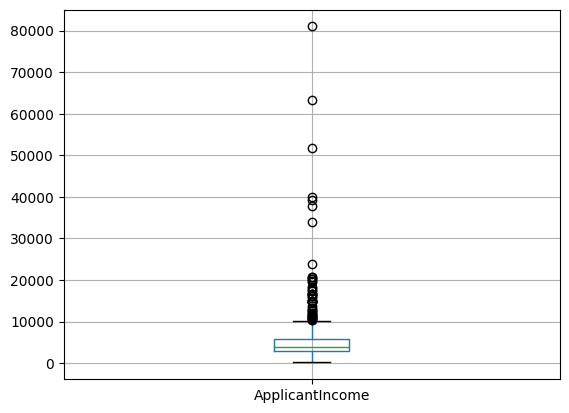

In [25]:
df.boxplot(column=['ApplicantIncome'])
plt.show()

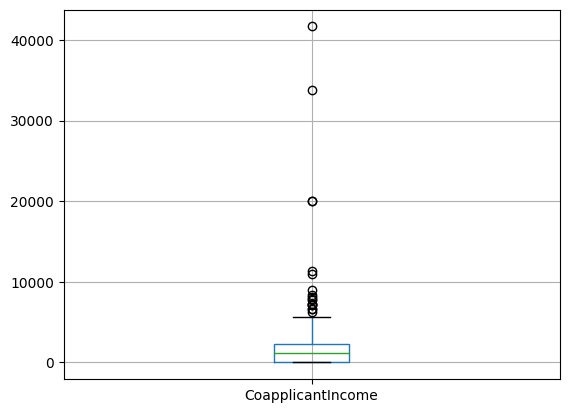

In [26]:
df.boxplot(column=['CoapplicantIncome'])
plt.show()

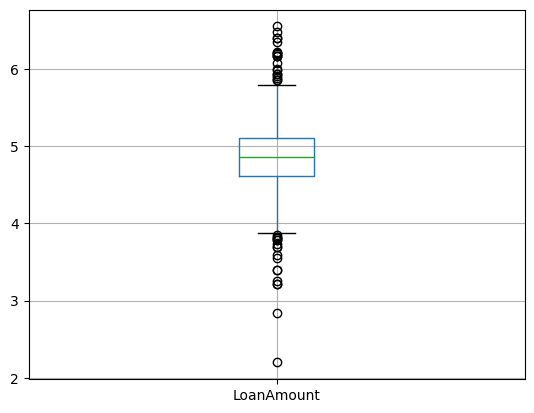

In [27]:
df.boxplot(column=['LoanAmount'])
plt.show()

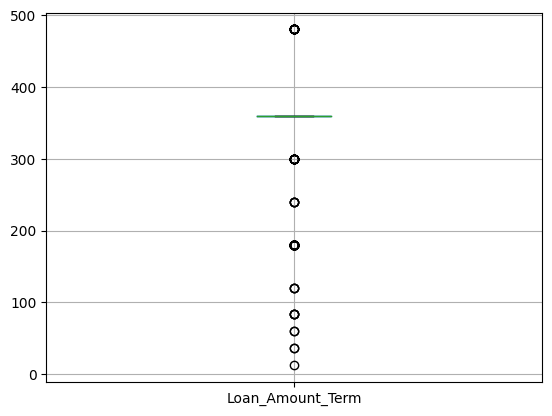

In [28]:
df.boxplot(column=['Loan_Amount_Term'])
plt.show()

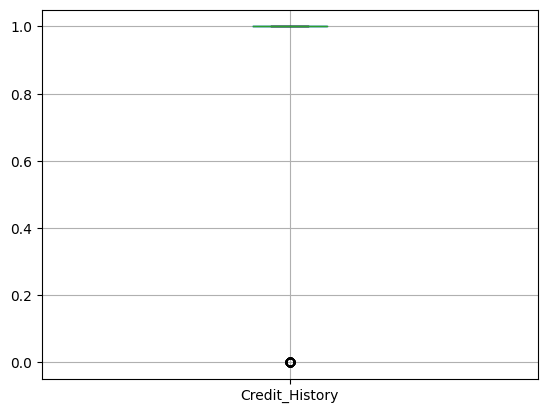

In [29]:
df.boxplot(column=['Credit_History'])
plt.show()

In [30]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [31]:
columns_to_handle = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply Winsorization to handle outliers for each column
for column in columns_to_handle:
    win_data = mstats.winsorize(df[column], limits=[0.09, 0.09])
    df[column] = win_data

# Print the updated DataFrame
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0    4.986426             360.0   
1             4583             1508.0    4.852030             360.0   
2             3000                0.0    4.248495             360.0   
3             2583             2358.0    4.787492             360.0   
4             6000                0.0    4.948760             360.0   

   Credit_History Property_Area Loan_Status  TotalIncome  
0             1.0         Urban           Y     8.674026  
1             1.0         Rural         

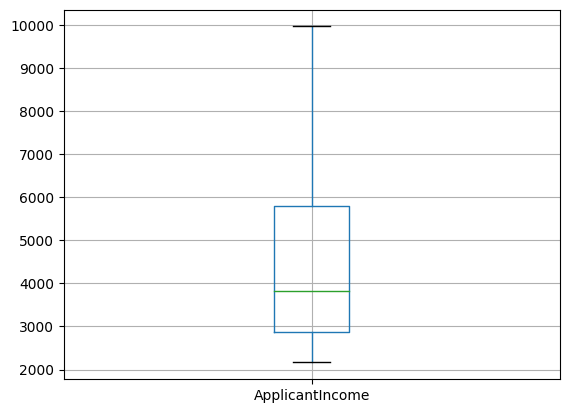

In [32]:
df.boxplot(column=['ApplicantIncome'])
plt.show()

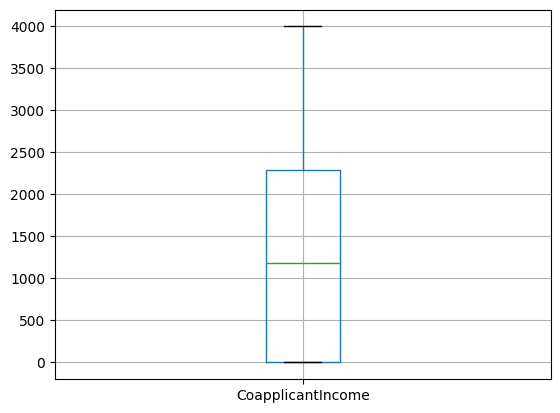

In [33]:


df.boxplot(column=['CoapplicantIncome'])
plt.show()

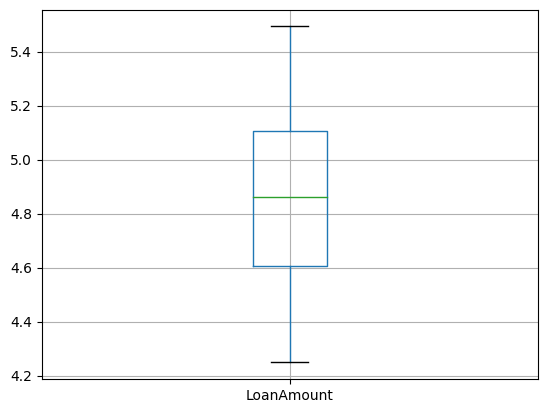

In [34]:
df.boxplot(column=['LoanAmount'])
plt.show()

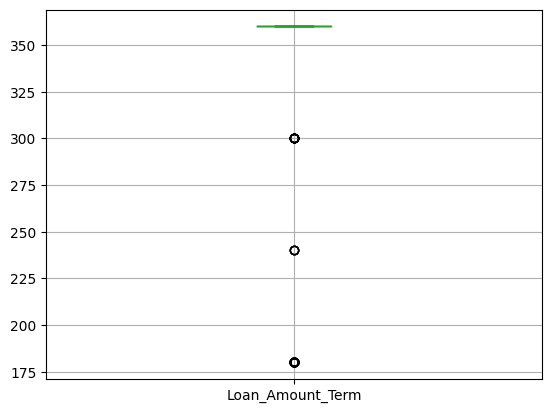

In [35]:
df.boxplot(column=['Loan_Amount_Term'])
plt.show()

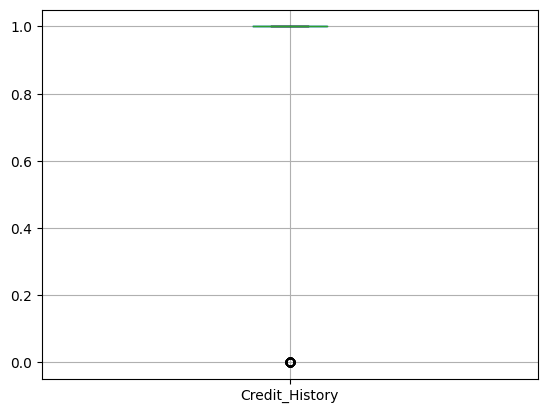

In [36]:
df.boxplot(column=['Credit_History'])
plt.show()

# Exploratory Data Analysis(EDA)


### data description

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [38]:
df.describe()

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4641.638436,1321.558502,4.863927,341.530945,0.855049,8.669414
std,2389.403669,1406.990420,0.359032,52.806410,0.352339,0.545102
min,2165.000000,0.000000,4.248495,180.000000,0.000000,7.273786
25%,2877.500000,0.000000,4.607658,360.000000,1.000000,8.334712
50%,3812.500000,1188.500000,4.859812,360.000000,1.000000,8.597205
75%,5795.000000,2297.250000,5.104426,360.000000,1.000000,8.925549
max,9963.000000,4000.000000,5.493061,360.000000,1.000000,11.302204


### Data Visualization

**How many people have a credit history in a bank?**

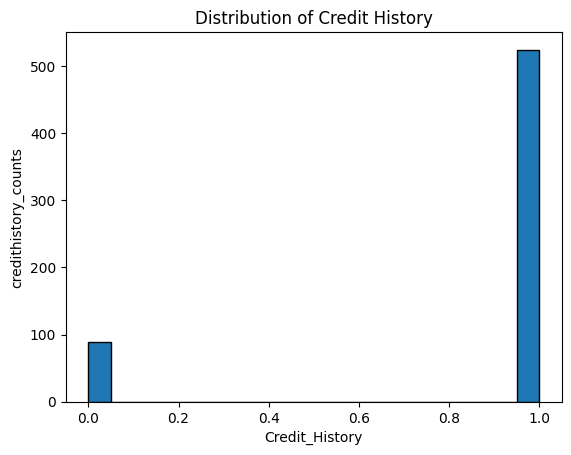

In [39]:
plt.hist(data=df,x='Credit_History', bins=20, edgecolor='black')
plt.xlabel('Credit_History')
plt.ylabel('credithistory_counts')
plt.title('Distribution of Credit History')
plt.show()

**Which area needs more loans?**

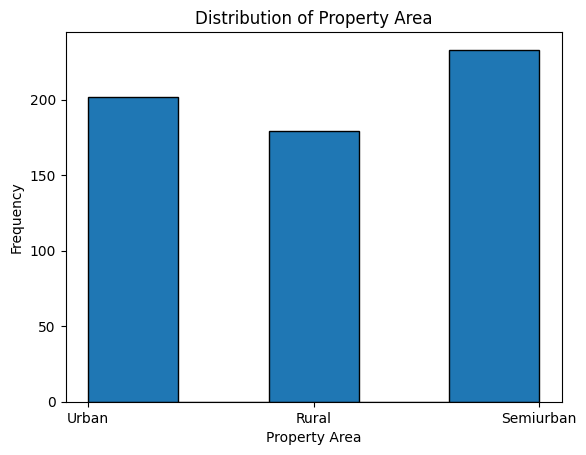

In [40]:
df['Property_Area'].value_counts()
plt.hist(data=df,x='Property_Area', bins=5, edgecolor='black')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.title('Distribution of Property Area')
plt.show()

**How much is the total income of someone who takes a loan?**

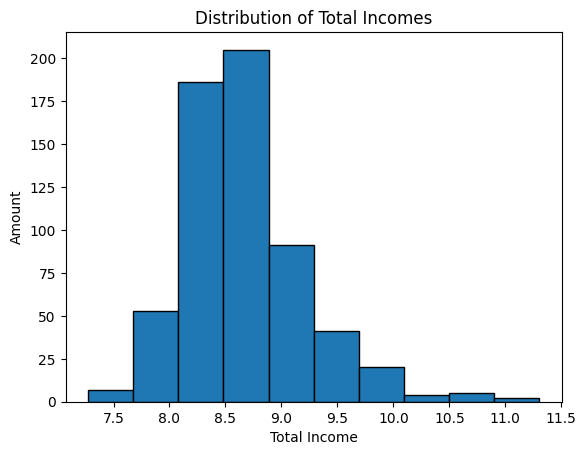

In [41]:
plt.hist(data=df,x='TotalIncome', bins=10, edgecolor='black')
plt.xlabel('Total Income')
plt.ylabel('Amount')
plt.title('Distribution of Total Incomes')
plt.show()

# BIVARIATE ANALYSIS

**How much is the total income of people who took a loan, and how much loan amount did they take?**

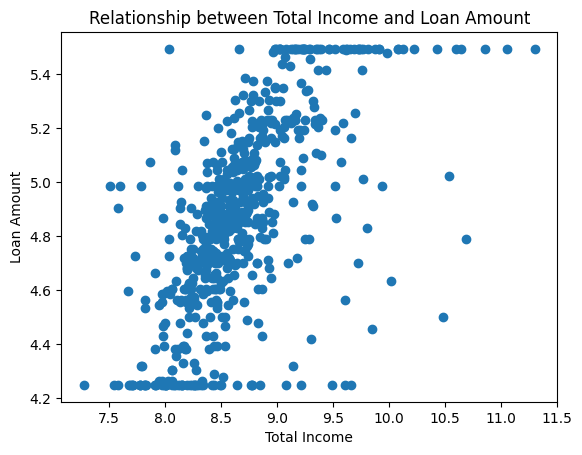

In [42]:
plt.scatter(data = df, x = 'TotalIncome', y = 'LoanAmount');
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Total Income and Loan Amount')
plt.show()

**How much is the total income of people who took a loan, and do they have a credit history in a bank or not?**

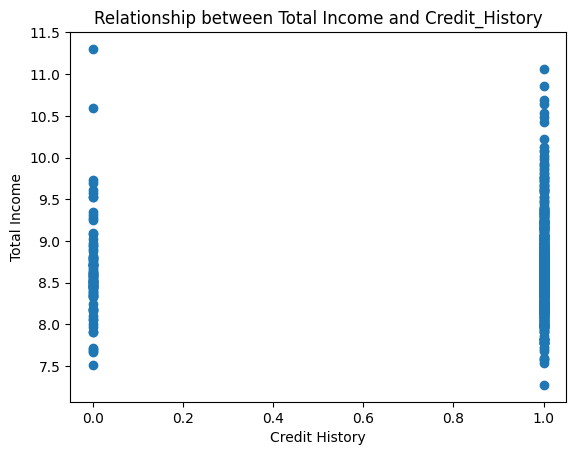

In [43]:
plt.scatter(data = df, x = 'Credit_History', y = 'TotalIncome');
plt.xlabel('Credit History')
plt.ylabel('Total Income')
plt.title('Relationship between Total Income and Credit_History')
plt.show()

**Which area needs more loans, and how much is the average loan amount they take?**

/tmp/ipykernel_23/4215596578.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Property_Area', y='LoanAmount', ci=None, color='skyblue')  # ci=None removes error bars


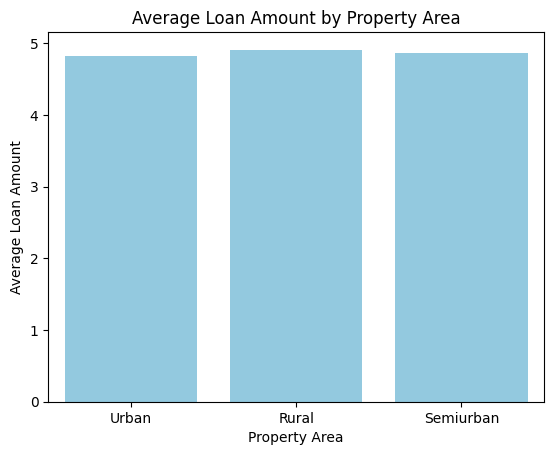

In [44]:
sns.barplot(data=df, x='Property_Area', y='LoanAmount', ci=None, color='skyblue')  # ci=None removes error bars

plt.xlabel('Property Area')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Property Area')

plt.show()


**How many people graduated taking a loan from a bank or not?**

In [45]:
cross_tab = pd.crosstab(df['Education'], df['Loan_Status'])
print(cross_tab)


Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


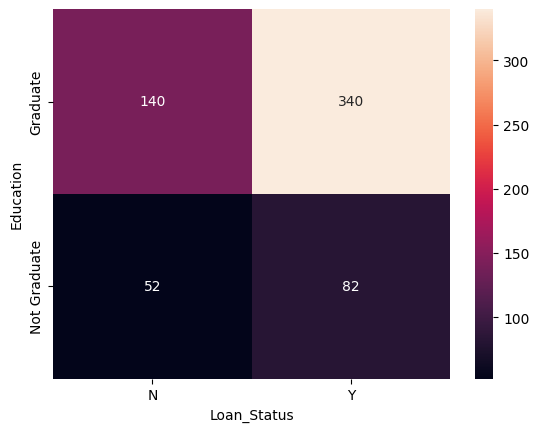

In [46]:
sns.heatmap(pd.crosstab(df.Education, df.Loan_Status), annot=True, fmt='d');

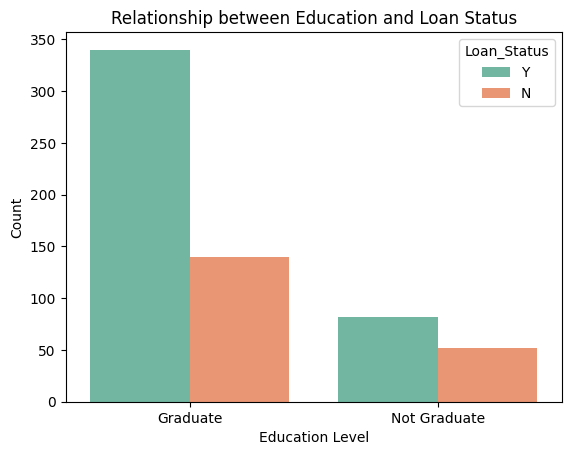

In [47]:
sns.countplot(data=df, x='Education', hue='Loan_Status', palette='Set2')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship between Education and Loan Status')

plt.show()


**How many people self employed taking a loan from a bank or not?**

In [48]:
cross_tab = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
print(cross_tab)


Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


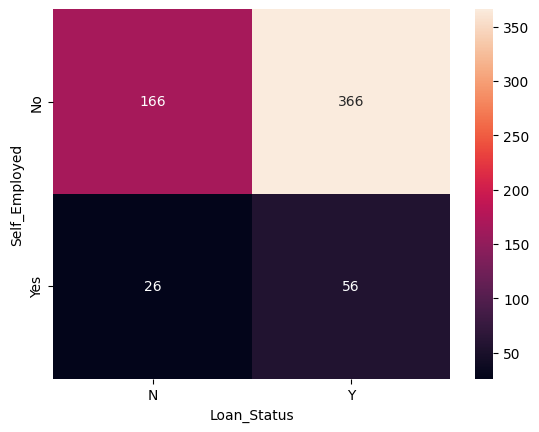

In [49]:
sns.heatmap(pd.crosstab(df.Self_Employed, df.Loan_Status), annot=True, fmt='d');

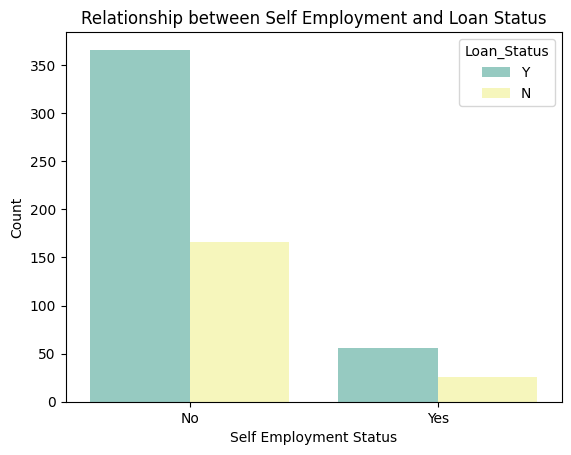

In [50]:
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status', palette='Set3')

plt.xlabel('Self Employment Status')
plt.ylabel('Count')
plt.title('Relationship between Self Employment and Loan Status')

plt.show()

# MULTIVARIATE ANALYSIS

**What is the relation or correlation between all numerical columns?**

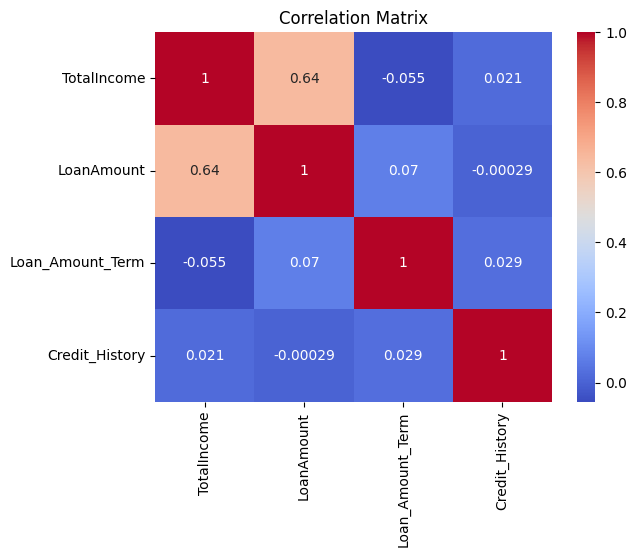

In [51]:

numerical_columns = ['TotalIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

correlation_matrix = df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# MACHINE LEARNING PREPROCESSING

# ENCODING

In [52]:
from sklearn import preprocessing 

# lable encoders
label_encoder = preprocessing.LabelEncoder() 

# converting gender to numeric values
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Dependents']=label_encoder.fit_transform(df['Dependents'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,5849,0.0,4.986426,360.0,1.0,2,1,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,4.248495,360.0,1.0,2,1,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1,8.699515


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory usage: 67.3+ KB


# SCALING


# DecisionTreeClassifier, RandomForestClassifier, and GradientBoostingClassifier do not require feature scaling or normalization. This is because:They split data based on feature thresholds, which are not affected by the feature's scale.The model is invariant to scaling because it only depends on feature ordering, not their magnitude.


# SPLITTING DATA 

In [54]:
# Separate features and target variable
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [55]:
 #Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Model 1
# DecisionTree

**accuracy in train test split **

In [57]:
#Create and train the Decision Tree classifier
pipelineDecisionTree = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing
    ('classifier', DecisionTreeClassifier())  # Model
])

# Train pipeline on training set
pipelineDecisionTree.fit(X_train, y_train)

# Evaluate on the test set
y_pred = pipelineDecisionTree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [58]:
print("Predicted labels:", y_pred)

Predicted labels: [1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 0 1 1 1]


In [59]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7154471544715447


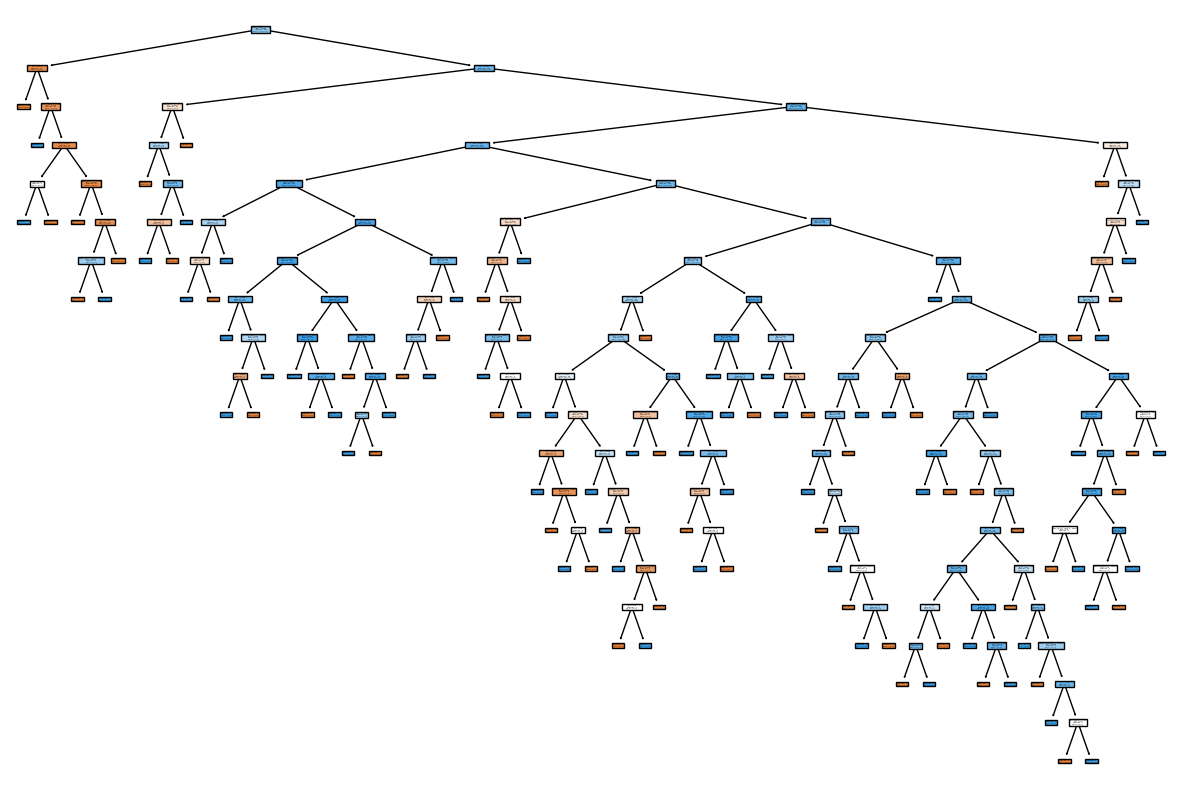

In [60]:
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()

**cross validation accuracy of DecisionTreeClassifier with k folds split **

Cross-validation accuracy scores for each fold: [0.85 0.95 0.9  0.9  0.9 ]
Mean accuracy across all folds: 0.90


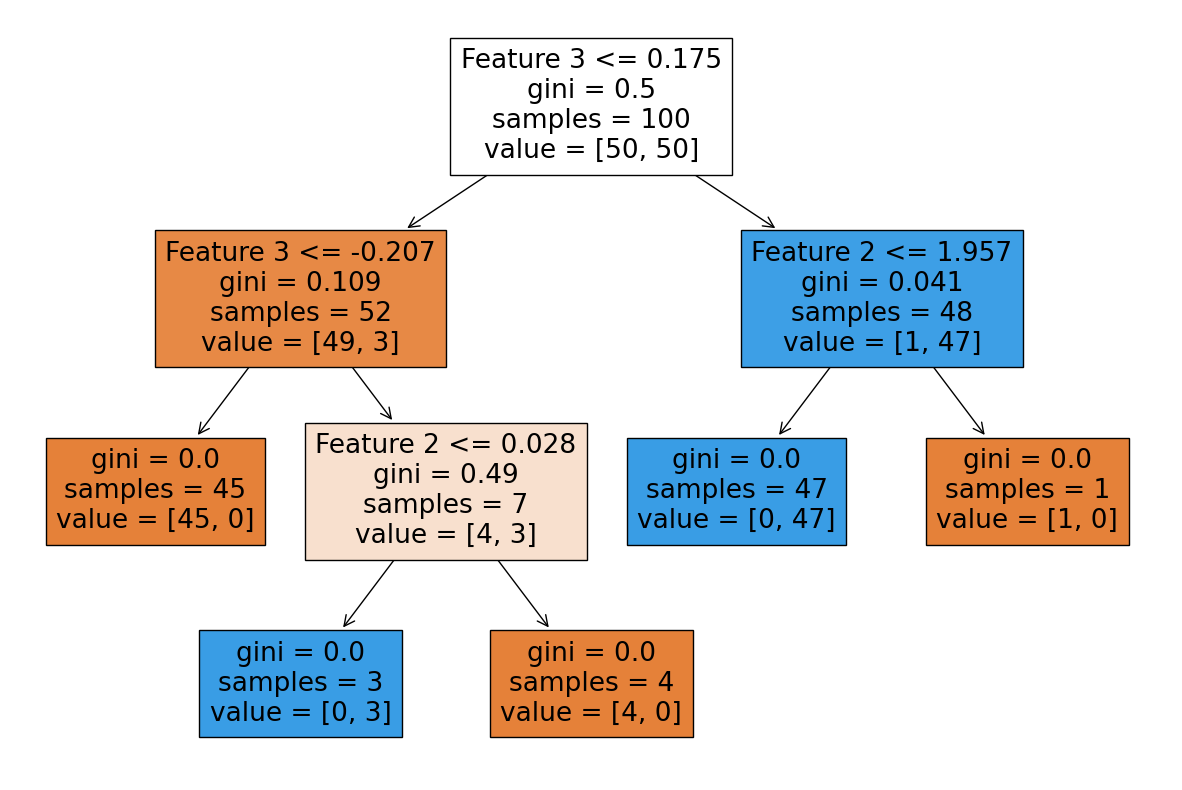

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Create a synthetic dataset for binary classification
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Define the pipeline
pipelineDecisionTree = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing
    ('classifier', DecisionTreeClassifier(random_state=42))  # Model
])

# Perform K-fold cross-validation (e.g., 5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipelineDecisionTree, X, y, cv=kf)

# Print cross-validation results
print(f"Cross-validation accuracy scores for each fold: {cv_scores}")
print(f"Mean accuracy across all folds: {cv_scores.mean():.2f}")

# If you want to train the final model and visualize the decision tree
pipelineDecisionTree.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(pipelineDecisionTree.named_steps['classifier'], feature_names=[f"Feature {i}" for i in range(X.shape[1])], filled=True)
plt.show()


In [62]:
# Model 2 
# Naive Bayes

In [63]:
# Define pipeline
pipelineGaussianNB = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

# Evaluate pipeline using cross-validation
scores = cross_val_score(pipelineGaussianNB, X, y, cv=5)
print(f"Cross-validation accuracy: {scores.mean():.2f}")

Cross-validation accuracy: 0.93


In [64]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_prednb = nb_classifier.predict(X_test)


In [65]:
accuracy_GaussianNB = accuracy_score(y_test, y_prednb)
print("Accuracy:", accuracy_GaussianNB)

Accuracy: 0.7804878048780488


In [66]:
# Make predictions on the test set
y_prednb = nb_classifier.predict(X_test)

# Print the predicted labels
print("Predicted labels:", y_prednb)

Predicted labels: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
#Naive Bayes model with k-fold split

In [67]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Define pipeline
pipelineGaussianNB = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', GaussianNB())  # Model
])

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Perform cross-validation scoring
scores = cross_val_score(pipelineGaussianNB, X, y, cv=kf)
print(f"Cross-validation accuracy scores for each fold: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

# Perform cross-validation predictions
y_prednb = cross_val_predict(pipelineGaussianNB, X, y, cv=kf)

# Evaluate predictions
accuracy_GaussianNB = accuracy_score(y, y_prednb)
print(f"Overall accuracy (from cross-validated predictions): {accuracy_GaussianNB:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_prednb))


Cross-validation accuracy scores for each fold: [1.   0.9  0.85 0.9  0.9 ]
Mean CV accuracy: 0.91
Overall accuracy (from cross-validated predictions): 0.9100

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.90      0.92      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In [68]:
# Model 3 
# Gradient Boosting

**accuracy GradientBoostingClassifier with k-folds split**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Create the pipeline
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', GradientBoostingClassifier(random_state=42))  # Model
])

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Perform cross-validation scoring
cv_scores = cross_val_score(pipeline_gb, X, y, cv=kf)  # Evaluates pipeline

# Print cross-validation results
print(f"Cross-validation accuracy scores for each fold: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")

# Perform cross-validation predictions
y_pred_gb = cross_val_predict(pipeline_gb, X, y, cv=kf)  # Get predictions for each fold

# Evaluate predictions
accuracy = accuracy_score(y, y_pred_gb)
print(f"Overall accuracy (from cross-validated predictions): {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred_gb))


Cross-validation accuracy scores for each fold: [0.85 0.95 0.9  0.9  0.9 ]
Mean CV accuracy: 0.9000
Overall accuracy (from cross-validated predictions): 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.93      0.86      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



**accuracy GradientBoostingClassifier with train test split**

In [83]:
pipeline_gb = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))  # Step 2: Apply GradientBoostingClassifier
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline_gb, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

Cross-validation scores: [0.82828283 0.73469388 0.73469388 0.76530612 0.82653061]
Mean CV score: 0.7779


In [71]:
from sklearn.metrics import accuracy_score
# Fit the pipeline using training data
pipeline_gb.fit(X_train, y_train)
# Predict using the fitted pipeline
y_pred_gb = pipeline_gb.predict(X_test)



In [72]:
print("Predicted labels:", y_pred_gb)

Predicted labels: [1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1]


**Accuracy without cross validation**

In [73]:
# Calculate the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)


Accuracy: 0.7317073170731707


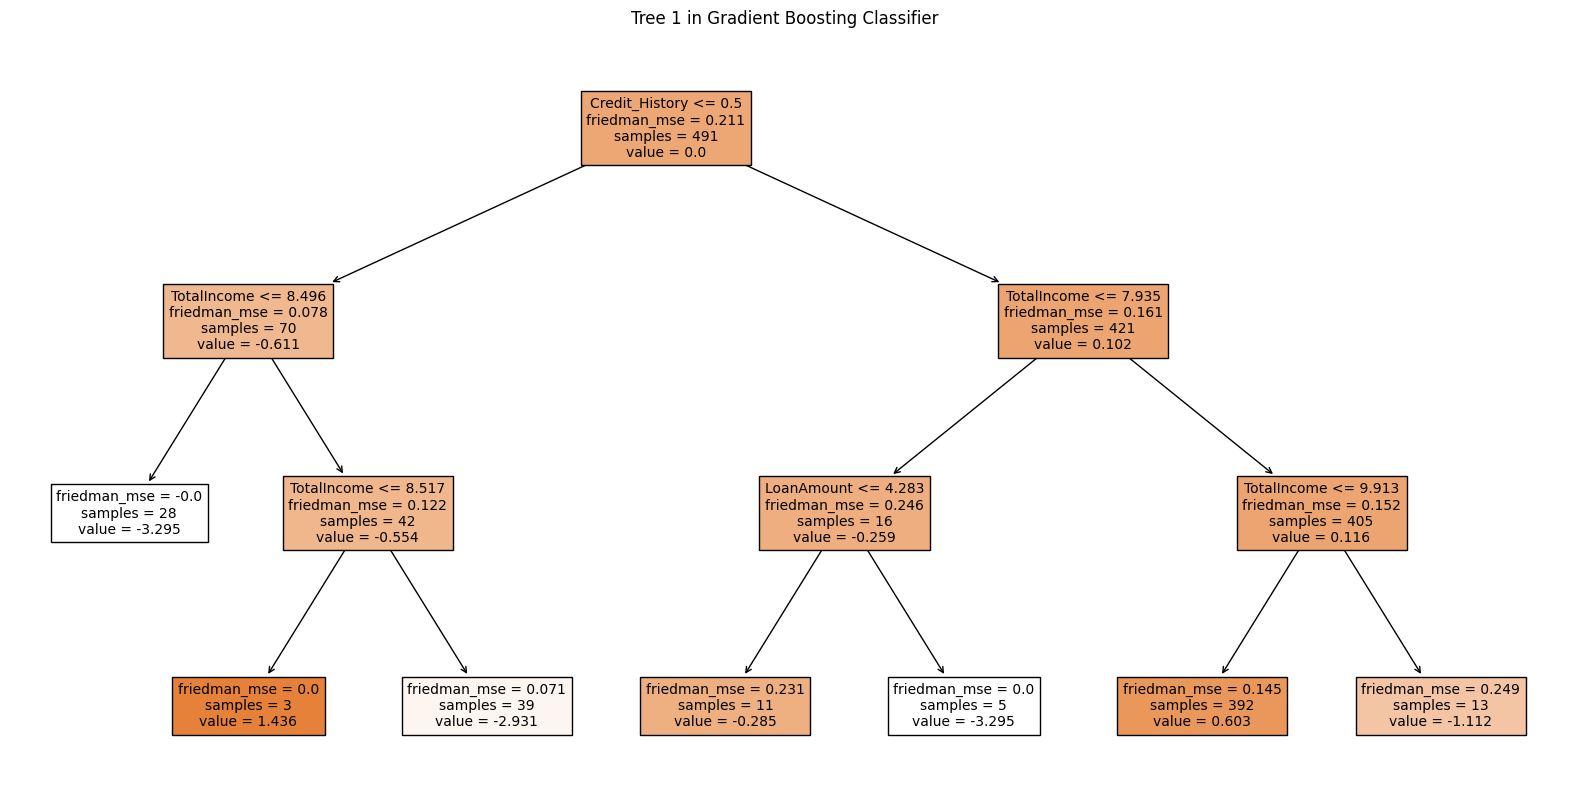

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access an individual tree
gb_model = pipeline_gb.named_steps['model']  # Extract the GradientBoostingClassifier
tree = gb_model.estimators_[0, 0]  # Access the first tree of the first stage

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in np.unique(y_train)], fontsize=10)
plt.title("Tree 1 in Gradient Boosting Classifier")
plt.show()



**model 4:  Neural Network with test_train split**
s

In [75]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Define the Neural Network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])







/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


I0000 00:00:1734378713.353411     107 service.cc:145] XLA service 0x7affb4011ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734378713.353469     107 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734378713.353473     107 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3125 - loss: 0.7730

I0000 00:00:1734378714.435929     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5009 - loss: 0.7105
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5931 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7621 - loss: 0.5448 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8001 - loss: 0.5110 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.4793 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 0.4865 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8160 - loss: 0.4604 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 0.4727 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.4154 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.4313 


In [79]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7998 - loss: 0.5265
Test Loss: 0.5441526770591736
Test Accuracy: 0.7886179089546204


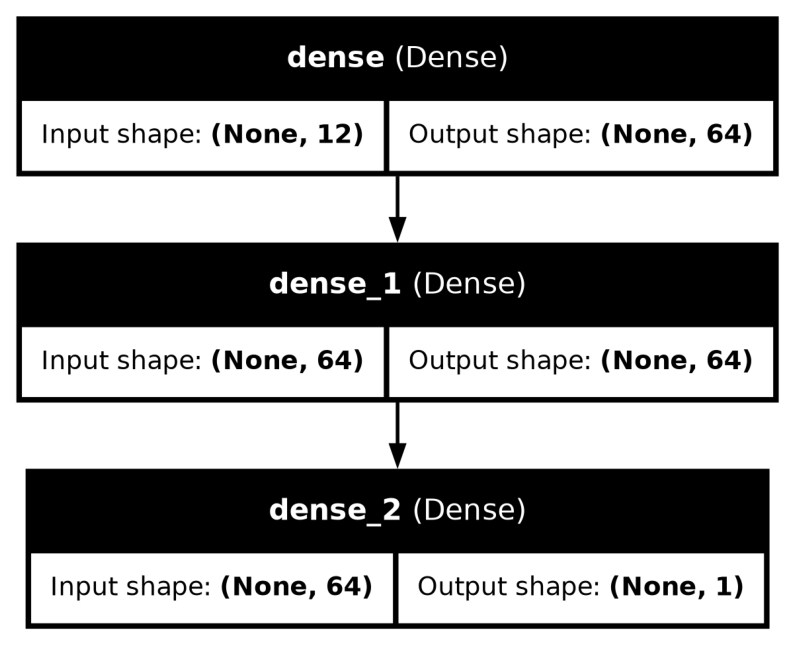

In [80]:
from tensorflow.keras.utils import plot_model
# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(10, 10))
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.axis('off')
plt.show()


**Neural Network with K-fold  split** 

In [85]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # First hidden layer
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_scores = []

# Perform KFold cross-validation
for train_index, val_index in kf.split(X):
    # Split data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Create and train the model (assuming create_model is defined)
    model = create_model()
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    cv_scores.append(accuracy)

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Cross-validation scores: [1.0, 1.0, 0.95, 0.95, 1.0]
Mean cross-validation score: 0.9800


**Neural Network with a pipeline with StandardScaler and custom Keras model and with K-fold split**

In [87]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define a custom estimator class
class KerasNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=50, batch_size=10):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = Sequential()
        self.model.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # First hidden layer
        self.model.add(Dense(64, activation='relu'))  # Second hidden layer
        self.model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Fit the model
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

# Create a pipeline with StandardScaler and custom Keras model
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('model', KerasNNClassifier(epochs=50, batch_size=10))  # Step 2: Custom neural network model
])

# Now you can use this pipeline with KFold as shown earlier
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_scores = []

# Perform KFold cross-validation
for train_index, val_index in kf.split(X):
    # Split data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Create and train the model (assuming create_model is defined)
    model = create_model()
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    cv_scores.append(accuracy)

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Cross-validation scores: [1.0, 1.0, 0.95, 0.95, 1.0]
Mean cross-validation score: 0.9800
